# Nonlinear elliptic equation 

Solving
u''(x) + 1 / u(x)^3 = 0
with boundary conditions u'(0) = 0, u(1) = 1 using second-order finite-difference approximation and newton's iteration (using a staggered grid)

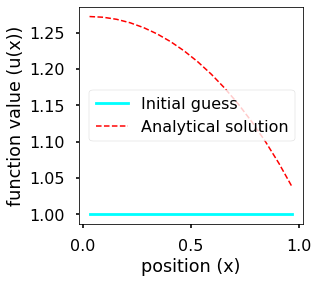

Stopping condition: Residuum < 0.000001 has been fullfilled!
Number of iteration steps done: 5
Stopping condition: Residuum < 0.000001 has been fullfilled!
Number of iteration steps done: 5
Stopping condition: Residuum < 0.000001 has been fullfilled!
Number of iteration steps done: 5
Stopping condition: Residuum < 0.000001 has been fullfilled!
Number of iteration steps done: 5
Stopping condition: Residuum < 0.000001 has been fullfilled!
Number of iteration steps done: 5
Stopping condition: Residuum < 0.000001 has been fullfilled!
Number of iteration steps done: 5
Stopping condition: Residuum < 0.000001 has been fullfilled!
Number of iteration steps done: 5
Stopping condition: Residuum < 0.000001 has been fullfilled!
Number of iteration steps done: 5


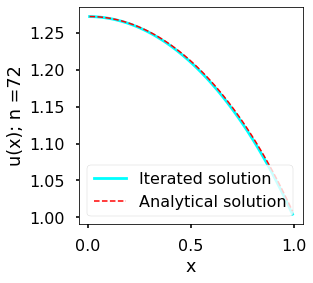

In [13]:
#Exercise 7 Newton's scheme staggered grid (7e)
import numpy as np
from numpy.linalg import inv
import math
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline

e = []
#maximal number of iterations z
z = 100

#to get convergence order repeat with more points on grid
for o in range(1,9):

    #number of gridpoints n
    n = 8*o + 8
    h = 1/(n)

    # Get A
    A = np.zeros((n, n))
    A[0, 0] = -1
    A[0, 1] = 1
    A[n-1, n-1] = -3
    A[n-1, n-2] = 1
    for i in range(1, n-1):
        A[i, i-1] = 1
        A[i, i] = -2
        A[i, i+1] = 1

    A = 1/h**2*A

    #initial guess u1 and analytical solution sol for plot
    u1 = np.zeros(n)
    sol = np.zeros(n)
    b1 = -0.763932
    b2 = 1.11179

    for i in range(0, n):
        u1[i] = 1
        sol[i] = ((b1)*(i*h)**2 + 2)**(1/2)/(b2)
        
    # Get nonlinear part, its derivative n and grid x
    nonlin = np.zeros(n)
    dnonlin = np.zeros((n, n))
    x = np.zeros(n)
    for j in range(0, n-1):
        x[j] = (j + 1/2)*h
        nonlin[j] = 1/u1[j]**3
        dnonlin[j,j] = - 3/u1[j]**4
    nonlin[n-1] = 2/h**2 + 1/u1[n-1]**3
    dnonlin[n-1,n-1] = - 3/u1[n-1]**4
    x[n-1] = (n-1+1/2)*h

    # y needed for plot
    y = np.linspace(0+h/2, 1-h/2, n)
    
    #Plot initial guess and analytical solution
    if o == 1:
        plt.figure(figsize=(4,4))
        plt.plot(y, u1, label = "Initial guess", color = "cyan")
        plt.plot(y, sol, label = "Analytical solution", color = "red", linewidth = "1.5", linestyle = "dashed")
        plt.xlabel('position (x)')
        plt.ylabel('function value (u(x))')
        plt.legend()
        plt.show()
    
    #initial residuum
    res = +1/u1**3 + A.dot(u1)
    
    #print(dnonlin)
    #loop for next iterations:
    for i in range(1,z+1):
        #condition to end after certain value of residuum is achieved
        if all(abs(res) < 0.000001):
            print('Stopping condition: Residuum < 0.000001 has been fullfilled!')
            print('Number of iteration steps done:' + ' ' + str(i))
            break
        if any(u1 == 0):
            break
        for j in range(0, n):
            #get updated f
            nonlin[j] = 1/u1[j]**3
            dnonlin[j,j] = - 3/u1[j]**4
        #[n-1] has different formula:
        nonlin[n-1] = 2/h**2 + 1/u1[n-1]**3
        dnonlin[n-1,n-1] = - 3/u1[n-1]**4
        #print(A + dnonlin)
        u1 = u1+1*np.linalg.solve(A + dnonlin, -nonlin- A.dot(u1))
        #needed for stopping condition
        res = +1/u1**3 + A.dot(u1)
        res[-1] = 0
    
    #calculate error
    e.append(np.linalg.norm(sol - u1)*1/n)
    
    if o == 8:
        plt.figure(figsize=(4,4))
        plt.plot(y, u1, label = "Iterated solution", color = "cyan")
        plt.plot(y, sol, label = "Analytical solution", color = "red", linestyle = 'dashed', linewidth = '1.5')
        plt.xlabel('x')
        plt.ylabel('u(x)' + "; n =" + str(n))
        plt.legend()
        plt.show()

Convergence order = 1.4723583489635548


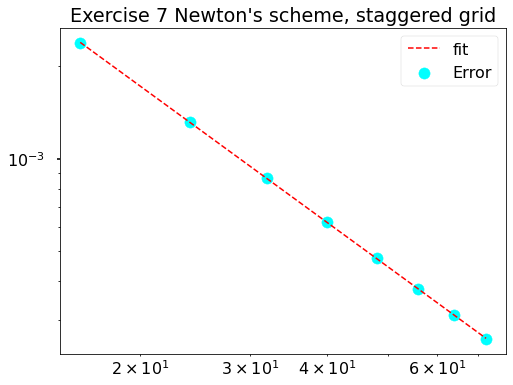

In [12]:
from scipy.optimize import curve_fit

#linear fit to find convergence order
y1 = np.array([16, 24, 32, 40, 48, 56, 64, 72])

def fit_func(x1, a, b):
    return a*x1 + b

params = curve_fit(fit_func,np.log(y1), np.log(e))

[a,b] = params[0]
print("Convergence order = " + str(-a))

plt.figure(figsize=(8,6))
plt.scatter(y1, e, color = "cyan", label = "Error", marker = 'o')
plt.plot(y1, np.exp(a*(np.log(y1)) +b), linestyle = "dashed", linewidth = "1.5", color = "red", label = "fit")
plt.yscale('log')
plt.xscale('log')
plt.title("Exercise 7 Newton's scheme, staggered grid")
plt.legend()
plt.show()


In [9]:
#Exercise 7 Newton's scheme staggered grid (7e)
import statistics
from numpy.linalg import inv
import math


err = []
r = []
#maximal number of iterations z
z = 15

#to get convergence order repeat with more points on grid

#number of gridpoints n
n = 64
h = 1/(n)

# Get A
A = np.zeros((n, n))
A[0, 0] = -1
A[0, 1] = 1
A[n-1, n-1] = -3
A[n-1, n-2] = 1
for i in range(1, n-1):
    A[i, i-1] = 1
    A[i, i] = -2
    A[i, i+1] = 1

A = 1/h**2*A

#initial guess u1 and analytical solution sol for plot
u1 = np.zeros(n)
sol = np.zeros(n)
b1 = -0.763932
b2 = 1.11179

for i in range(0, n):
    u1[i] = 1
    sol[i] = ((b1)*(i*h)**2 + 2)**(1/2)/(b2)

# Get nonlinear part, its derivative n and grid x
nonlin = np.zeros(n)
dnonlin = np.zeros((n, n))
x = np.zeros(n)
for j in range(0, n-1):
    x[j] = (j + 1/2)*h
    nonlin[j] = 1/u1[j]**3
    dnonlin[j,j] = - 3/u1[j]**4
nonlin[n-1] = 2/h**2 + 1/u1[n-1]**3
dnonlin[n-1,n-1] = - 3/u1[n-1]**4
x[n-1] = (n-1+1/2)*h

# y needed for plot
y = np.linspace(0+h/2, 1-h/2, n)

#initial residuum
res = +1/u1**3 + A.dot(u1)

#print(dnonlin)
#loop for next iterations:
for i in range(1,z+1):
    if any(u1 == 0):
        break
    for j in range(0, n):
        #get updated f
        nonlin[j] = 1/u1[j]**3
        dnonlin[j,j] = - 3/u1[j]**4
    #[n-1] has different formula:
    nonlin[n-1] = 2/h**2 + 1/u1[n-1]**3
    dnonlin[n-1,n-1] = - 3/u1[n-1]**4
    #print(A + dnonlin)
    u1 = u1+1*np.linalg.solve(A + dnonlin, -nonlin- A.dot(u1))
    #needed for stopping condition
    res = +1/u1**3 + A.dot(u1)
    res[-1] = 0
    r.append(statistics.mean(res))
    err.append(np.linalg.norm(sol - u1)*1/n)

Convergence order = 2.615423149179304


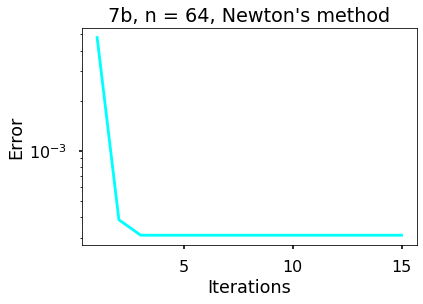

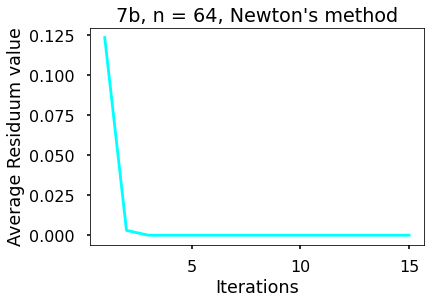

In [10]:
from scipy.optimize import curve_fit

#y1 = np.array([16, 24, 32, 40, 48, 56, 64, 72])
y1 = np.array([5, 10, 15, 20, 25, 30])
y2 = np.array([1,2,3,4,5,6,7,8,9, 10, 11, 12, 13, 14, 15])
y3 = np.array([1,2,3])
#e3 = e[0:15]              
              
def fit_func(x1, a, b):
    return a*x1 + b

params = curve_fit(fit_func,np.log(y3), np.log(err[0:3] ))

[a,b] = params[0]
print('Convergence order = ' + str(-a))

plt.figure(figsize=(6,4))
plt.plot(y2, err, color = "cyan")
plt.yscale('log')
#plt.xscale('log')
plt.title('7b, n = ' + str(n) + ", Newton's method")
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.show()

plt.figure(figsize=(6,4))
plt.plot(y2, r, color = "cyan")
#plt.yscale('log')
#plt.xscale('log')
plt.title('7b, n = ' + str(n) + ", Newton's method")
plt.xlabel('Iterations')
plt.ylabel('Average Residuum value')
plt.show()